In [4]:
import pandas as pd
import re
import missingno as msno
import psycopg2 as pg2

ModuleNotFoundError: No module named 'psycopg2'

In [2]:
# Read the csv file
df = pd.read_csv('C:\\Language_Projects\\Language_Projects\\Python\\Flagship_1\\automotive_diagnostic_data_analysis\\data\\Pre-Screen_Test_Results.csv')

In [3]:
# Print the info of the extracted column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8395 entries, 0 to 8394
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Created Time  8395 non-null   object 
 1   H Number      8395 non-null   object 
 2   Entry Type    8395 non-null   object 
 3   Technician    8335 non-null   object 
 4   Source        8395 non-null   object 
 5   Year          8394 non-null   float64
 6   Make          8395 non-null   object 
 7   Model         8393 non-null   object 
 8   Engine Size   8162 non-null   object 
 9   HW #          7363 non-null   object 
 10  Part #        7950 non-null   object 
 11  Notes         8348 non-null   object 
dtypes: float64(1), object(11)
memory usage: 787.2+ KB


In [4]:
# As the entry type 'RMA Test Results' does not contain prescreen notes, the rows with this entry type will be removed
df['Entry Type'].value_counts()

Entry Type
Pre-Screen Form Completed    5044
RMA Pre-Screen               1762
RMA Test Results             1589
Name: count, dtype: int64

In [5]:
# Filter the DataFrame excluding the entry type 'RMA Test Results'
df_prescreen_notes = df[df['Entry Type'].isin(['RMA Pre-Screen', 'Pre-Screen Form Completed'])]

In [6]:
# Check the df updated
df_prescreen_notes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6806 entries, 0 to 8394
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Created Time  6806 non-null   object 
 1   H Number      6806 non-null   object 
 2   Entry Type    6806 non-null   object 
 3   Technician    6754 non-null   object 
 4   Source        6806 non-null   object 
 5   Year          6806 non-null   float64
 6   Make          6806 non-null   object 
 7   Model         6805 non-null   object 
 8   Engine Size   6615 non-null   object 
 9   HW #          6001 non-null   object 
 10  Part #        6444 non-null   object 
 11  Notes         6760 non-null   object 
dtypes: float64(1), object(11)
memory usage: 691.2+ KB


In [7]:
# Create a dataframe with only the 'Pre-Screen Form Completed' entry type
df_prescreen_zoho_form = df_prescreen_notes[df_prescreen_notes['Entry Type'] == 'Pre-Screen Form Completed']

In [8]:
# Check the df updated
df_prescreen_zoho_form.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5044 entries, 13 to 8394
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Created Time  5044 non-null   object 
 1   H Number      5044 non-null   object 
 2   Entry Type    5044 non-null   object 
 3   Technician    5044 non-null   object 
 4   Source        5044 non-null   object 
 5   Year          5044 non-null   float64
 6   Make          5044 non-null   object 
 7   Model         5043 non-null   object 
 8   Engine Size   4902 non-null   object 
 9   HW #          4472 non-null   object 
 10  Part #        4789 non-null   object 
 11  Notes         5044 non-null   object 
dtypes: float64(1), object(11)
memory usage: 512.3+ KB


The CRM form contains the string 'Additional Notes' and the Entry Type 'Pre-Screen Form Completed' should contains only those accounts prescreened with the CRM form. 

In [9]:
# Confirm if the Entry Type 'Pre-Screen Form Completed' has only accounts prescreened with CRM form by using the string 'Additional Notes'
additional_notes_checking = df_prescreen_zoho_form['Notes'].str.contains('Additional Notes', case=False, na=False)

In [10]:
# Count if there is a False value
additional_notes_checking.value_counts()

Notes
True    5044
Name: count, dtype: int64

ORIGINAL PROBLEMS

In [11]:
# Extract the original problem from column notes and store in a variable
original_problem_zoho_form_extracted = df_prescreen_zoho_form['Notes'].str.extract(r'experienced with customers original unit:\s*(.*?)(?=DTCs on original unit)', flags=re.IGNORECASE | re.DOTALL)

In [12]:
# Rename column 0
original_problem_zoho_form_renamed = original_problem_zoho_form_extracted.rename(columns={0: 'Original Problems'})

In [13]:
# A second regex to extract only the strings and the original problems
original_problem_zoho_form_orig_nochars = original_problem_zoho_form_renamed['Original Problems'].str.replace(r'<[^>]+>|\n|:|=|\?|\\|\/|\r', '', regex=True).str.strip()

ORIGINAL DTCs

In [14]:
# Regex to extract the information described on the original DTCs field
original_dtcs_zoho_form_extracted = df_prescreen_zoho_form['Notes'].str.extract(r'DTCs on original unit:(.*?)(?=<b>DTCs transcript:)', flags=re.IGNORECASE | re.DOTALL)

In [15]:
# Rename column 0
original_dtcs_zoho_form_extracted_renamed = original_dtcs_zoho_form_extracted.rename(columns={0: 'Original DTCs'})

In [16]:
# A second regex to extract only the strings and the dtcs
original_dtcs_zoho_form_nochars = original_dtcs_zoho_form_extracted_renamed['Original DTCs'].str.replace(r'<[^>]+>|\n|:|=|\?|\\|\/|\r', '', regex=True).str.strip()

FS1 PROBLEMS

In [17]:
# Extract the fs1 problems and store in a variable
fs1_problems_zoho_form_extracted = df_prescreen_zoho_form['Notes'].str.extract(r'Problems experienced with our unit:(.*?)(?=DTCs on our unit:)', flags=re.IGNORECASE | re.DOTALL)

In [18]:
# Rename column 0
fs1_problems_zoho_form_renamed = fs1_problems_zoho_form_extracted.rename(columns={0: 'FS1 ECU Problems'})

In [19]:
# A second regex to extract only the strings and the fs1 problems
fs1_problems_extracted_nochars = fs1_problems_zoho_form_renamed['FS1 ECU Problems'].str.replace(r'<[^>]+>|\n|:|=|\?|\\|\/|\r', '', regex=True).str.strip()

FS1 DTCs

In [20]:
# Extract the fs1 dcts and store in a variable
fs1_dtcs_zoho_form = df_prescreen_zoho_form['Notes'].str.extract(r'DTCs on our unit:(.*?)(?=<b>DTCs transcript:)', flags=re.IGNORECASE | re.DOTALL)

In [21]:
# Rename column 0
fs1_dtcs_zoho_form_renamed = fs1_dtcs_zoho_form.rename(columns={0: 'FS1 DTCs'})

In [22]:
# A second regex to extract only the strings and the dtcs
fs1_dtcs_zoho_form_nochars = fs1_dtcs_zoho_form_renamed['FS1 DTCs'].str.replace(r'<[^>]+>|\n|:|=|\?|\\|\/|\r', '', regex=True).str.strip()

PROBLEMS RELATED

In [23]:
# Extract the original problems related information (Yes/No/Uncertain)
problems_related = df_prescreen_zoho_form['Notes'].str.extract(r'Are the original and current problems related.*?(Yes|No|Uncertain).*?(?=Were the proper diagnostic)', flags=re.IGNORECASE | re.DOTALL)

In [24]:
# Drop column 0
problems_related_renamed = problems_related.rename(columns={0: 'FS1/Original Problems Related'})

ADDITIONAL NOTES

In [25]:
# Extract the additional notes information and store in a variable
additional_notes_zoho_form = df_prescreen_zoho_form['Notes'].str.extract(r'Additional Notes/Testing Recommendations?\s*(.*?)(?=Resolution:)', flags=re.IGNORECASE | re.DOTALL)

In [26]:
additional_notes_zoho_form_renamed = additional_notes_zoho_form.rename(columns={0: 'Additional Notes'})

In [27]:
# A second regex to extract only the strings and the additional notes
additional_notes_zoho_form_nochars = additional_notes_zoho_form_renamed['Additional Notes'].str.replace(r'<[^>]+>|\n|:|=|\?|\\|\/|\r', '', regex=True).str.strip()

RESOLUTION

In [28]:
# Extract the resolution notes from column and store in a variable
resolution_notes_zoho_form = df_prescreen_zoho_form['Notes'].str.extract(r'Resolution:(.*)', flags=re.IGNORECASE | re.DOTALL)

In [29]:
# Rename column 0
resolution_notes_zoho_form_renamed = resolution_notes_zoho_form.rename(columns={0: 'Resolution'})

In [30]:
# A second regex to extract only the strings and the resolution
resolution_notes_zoho_form_nochars = resolution_notes_zoho_form_renamed['Resolution'].str.replace(r'<[^>]+>|\n|:|=|\?|\\|\/|\r', '', regex=True).str.strip()

In [31]:
# Concatenate the columns
df_zoho_form_last_update = pd.concat([df_prescreen_zoho_form, original_problem_zoho_form_orig_nochars, original_dtcs_zoho_form_nochars, fs1_problems_extracted_nochars, fs1_dtcs_zoho_form_nochars, problems_related_renamed, additional_notes_zoho_form_nochars, resolution_notes_zoho_form_nochars], axis=1)

In [32]:
# Print the first 5 rows of the new dataframe
df_zoho_form_last_update.head(2)

,Created Time,H Number,Entry Type,Technician,Source,Year,Make,Model,Engine Size,HW #,Part #,Notes,Original Problems,Original DTCs,FS1 ECU Problems,FS1 DTCs,FS1/Original Problems Related,Additional Notes,Resolution
13,"Jul 03, 2024 12:34 PM",H1483335,Pre-Screen Form Completed,Adeosun,S280762,2006.0,Saturn,ION,2.2L,E16A-26S,12605786,Extended Note:\n<hr><b>Task Owner:</b> Adeosun...,No power when accelerating,NO ERROR CODES,MODULE WOULD NOT START THE CAR PASSKEY II Pro...,None,No,I recommend we have the customer verify that t...,Customer must perform additional diagnosticsec...
14,"Jul 05, 2024 12:44 PM",H1480306,Pre-Screen Form Completed,Adeosun,S280194,2009.0,Ford,F-Series Truck,5.4L,9C2A-12B684-AC,9L3A-12A650-BXD,Extended Note:\n<hr><b>Task Owner:</b> Adeosun...,It starts but no ground for bank 2 sensor 1 o2...,P0050,It start but had code code p1639 vid programmi...,P1639,No,"Return both the original unit and our unit, so...","Return both the original unit and our unit, so..."


In [33]:
# Print the info of the new dataframe to check how many null values the new columns have
df_zoho_form_last_update.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5044 entries, 13 to 8394
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Created Time                   5044 non-null   object 
 1   H Number                       5044 non-null   object 
 2   Entry Type                     5044 non-null   object 
 3   Technician                     5044 non-null   object 
 4   Source                         5044 non-null   object 
 5   Year                           5044 non-null   float64
 6   Make                           5044 non-null   object 
 7   Model                          5043 non-null   object 
 8   Engine Size                    4902 non-null   object 
 9   HW #                           4472 non-null   object 
 10  Part #                         4789 non-null   object 
 11  Notes                          5044 non-null   object 
 12  Original Problems              5044 non-null   objec

<Axes: >

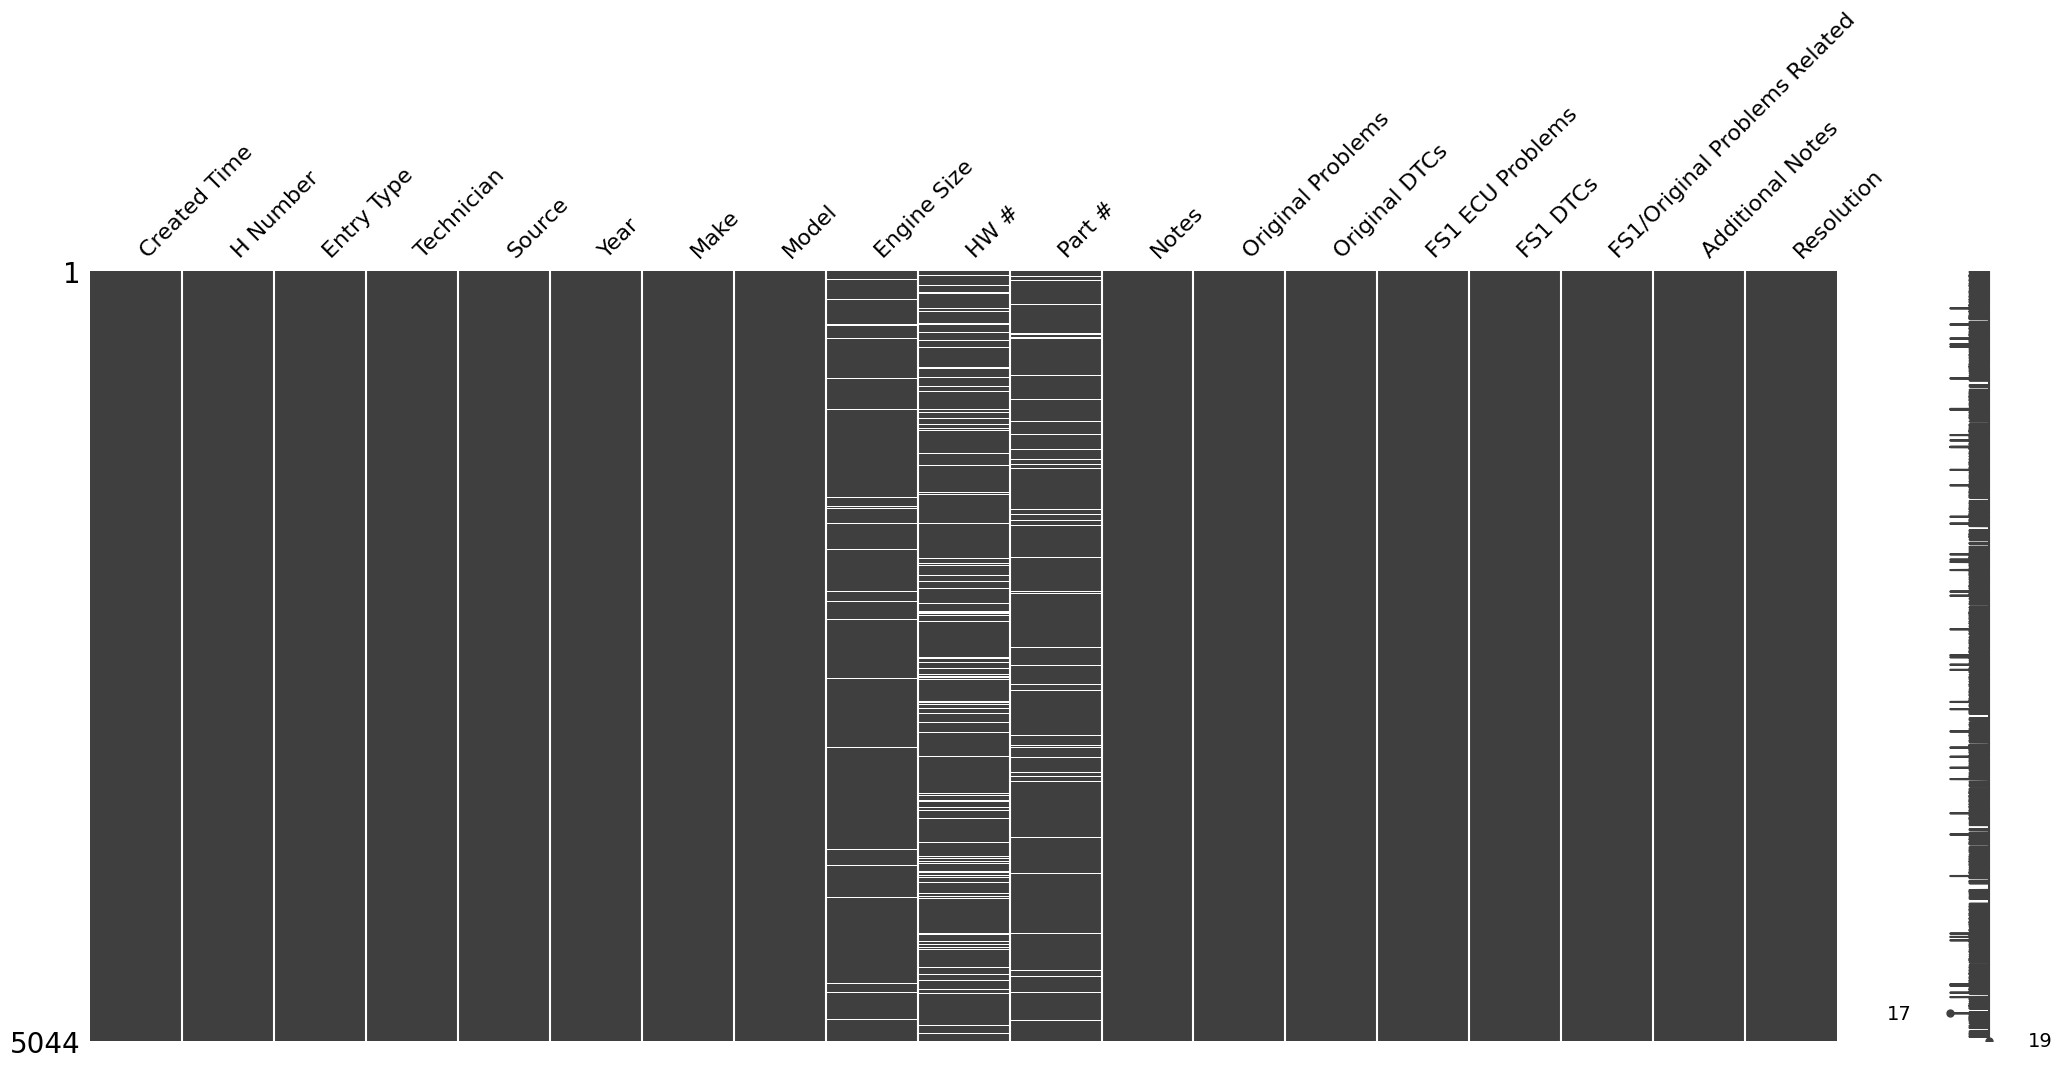

In [34]:
# Visualize the missing values on the new dataframe chart
msno.matrix(df_zoho_form_last_update)

In [35]:
# Get the value needed for filtering the dataframe
df_prescreen_notes['Entry Type'].values

array(['RMA Pre-Screen', 'RMA Pre-Screen', 'RMA Pre-Screen', ...,
       'Pre-Screen Form Completed', 'Pre-Screen Form Completed',
       'Pre-Screen Form Completed'], shape=(6806,), dtype=object)

In [36]:
# Create a new dataframe with only the prescreen notes done with the Google form
df_google_form_filtered = df_prescreen_notes[df_prescreen_notes['Entry Type'] == 'RMA Pre-Screen']

In [37]:
# Check the df after filtering
df_google_form_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1762 entries, 0 to 8387
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Created Time  1762 non-null   object 
 1   H Number      1762 non-null   object 
 2   Entry Type    1762 non-null   object 
 3   Technician    1710 non-null   object 
 4   Source        1762 non-null   object 
 5   Year          1762 non-null   float64
 6   Make          1762 non-null   object 
 7   Model         1762 non-null   object 
 8   Engine Size   1713 non-null   object 
 9   HW #          1529 non-null   object 
 10  Part #        1655 non-null   object 
 11  Notes         1716 non-null   object 
dtypes: float64(1), object(11)
memory usage: 179.0+ KB


In [38]:
# This spreadsheet already has the prescreen notes separated by field.
# Instead of extracting the information from the main df 'df_google_form_filtered', the following concatenates the data from this dataframe to the df_google_form
df_google_form_secondary = pd.read_excel('C:\\Language_Projects\\Language_Projects\\Python\\Flagship_1\\automotive_diagnostic_data_analysis\\data\\prescreen_google_form.xlsx')

In [39]:
# Confirming the column names
df_google_form_filtered.columns

Index(['Created Time', 'H Number', 'Entry Type', 'Technician', 'Source',
       'Year', 'Make', 'Model', 'Engine Size', 'HW #', 'Part #', 'Notes'],
      dtype='object')

In [40]:
# Drop some unnecessary columns
df_google_form_dropped_columns = df_google_form_secondary.drop(columns=['Unnamed: 3', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Timestamp for assignment log'])

In [41]:
# Rename the column "Acct. #" for "H Number" to match the main df
df_google_form_secondary_updated = df_google_form_dropped_columns.rename(columns={'Acct. #': 'H Number'})

In [42]:
# Print the dataframe information after cleaning
df_google_form_secondary_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7025 entries, 0 to 7024
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Timestamp                        7025 non-null   object
 1   Technician                       7025 non-null   object
 2   H Number                         7025 non-null   object
 3   Is this a replacement?           7025 non-null   object
 4   Year                             7025 non-null   int64 
 5   Make                             7025 non-null   object
 6   Model                            7025 non-null   object
 7   Engine Size                      7005 non-null   object
 8   VIN                              6994 non-null   object
 9   Module Type                      7015 non-null   object
 10  Service Provided                 6995 non-null   object
 11  Original Problem(s)              7012 non-null   object
 12  DTCs on original unit            6

In [43]:
# The column 'Service Provided' confirms if there are H numbers that need to be removed.
# After checking the service type, the ones that need to be removed are:
# Repair
# Testing
df_google_form_secondary_updated['Service Provided'].value_counts()

Service Provided
Programming                     6188
Virginized/Reset Immobilizer     307
Part Number/Sticker Check        250
Cloning                          128
Repair                           120
Testing                            2
Name: count, dtype: int64

In [44]:
# Filter the dataframe with only the service types needed 
df_google_form_secondary_servtype_needed = df_google_form_secondary_updated[df_google_form_secondary_updated['Service Provided'].isin(['Programming', 'Virginized/Reset Immobilizer', 'Part Number/Sticker Check', 'Cloning'])]

In [45]:
# Check mark with True the H numbers that are in the df_google_form_filtered as well as in the df_google_form_secondary_servtype_needed to be filtered
df_google_form_secondary_servtype_needed['h_number_in_google_form'] = df_google_form_secondary_servtype_needed['H Number'].isin(df_google_form_filtered['H Number'])

C:\Users\Weverson Barbieri\AppData\Local\Temp\ipykernel_12792\141029693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_google_form_secondary_servtype_needed['h_number_in_google_form'] = df_google_form_secondary_servtype_needed['H Number'].isin(df_google_form_filtered['H Number'])


In [46]:
# Check the value counts of the new column
df_google_form_secondary_servtype_needed['h_number_in_google_form'].value_counts()

h_number_in_google_form
False    6553
True      320
Name: count, dtype: int64

In [47]:
# Filter in one unique column "H Number" with the values showing as true (the method loc creates a unique column, in this case the column "H Number")
df_google_form_secondary_hnumber_true = df_google_form_secondary_servtype_needed[df_google_form_secondary_servtype_needed['h_number_in_google_form'].isin([True])]

In [48]:
# Create a column to show "true or false" if the account is duplicated
df_google_form_secondary_hnumber_true['duplicated_accounts'] = df_google_form_secondary_hnumber_true.duplicated(subset="H Number", keep=False)

C:\Users\Weverson Barbieri\AppData\Local\Temp\ipykernel_12792\3381129725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_google_form_secondary_hnumber_true['duplicated_accounts'] = df_google_form_secondary_hnumber_true.duplicated(subset="H Number", keep=False)


In [49]:
# Check the value of dupicated accounts to keep the ones that are ducplicated
df_google_form_secondary_hnumber_true['duplicated_accounts'].value_counts()

duplicated_accounts
False    266
True      54
Name: count, dtype: int64

In [50]:
# Create a new dataframe with the duplicated accounts
df_google_form_duplicated_account = df_google_form_secondary_hnumber_true[df_google_form_secondary_hnumber_true['duplicated_accounts'] == True]

In [51]:
# Create a new dataframe with non-duplicated accounts
df_google_form_secondary_non_duplicated = df_google_form_secondary_hnumber_true[df_google_form_secondary_hnumber_true['duplicated_accounts'] == False]

In [52]:
# Add an incremental number to the duplicated accounts and a new column to show a sequence starting with 0
df_google_form_duplicated_account['new_hnumber'] = df_google_form_duplicated_account.groupby('H Number').cumcount().astype(str).radd(df_google_form_duplicated_account['H Number'] + '.')

C:\Users\Weverson Barbieri\AppData\Local\Temp\ipykernel_12792\171079686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_google_form_duplicated_account['new_hnumber'] = df_google_form_duplicated_account.groupby('H Number').cumcount().astype(str).radd(df_google_form_duplicated_account['H Number'] + '.')


In [53]:
# Concatenate the duplicated accounts with the non-duplicated accounts
df_google_form_secondary_updated = pd.concat([df_google_form_duplicated_account, df_google_form_secondary_non_duplicated], ignore_index=True)

In [54]:
# Check the new dataframe updated after concatenate
df_google_form_secondary_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Timestamp                        320 non-null    object
 1   Technician                       320 non-null    object
 2   H Number                         320 non-null    object
 3   Is this a replacement?           320 non-null    object
 4   Year                             320 non-null    int64 
 5   Make                             320 non-null    object
 6   Model                            320 non-null    object
 7   Engine Size                      319 non-null    object
 8   VIN                              320 non-null    object
 9   Module Type                      320 non-null    object
 10  Service Provided                 320 non-null    object
 11  Original Problem(s)              319 non-null    object
 12  DTCs on original unit            246

In [55]:
# Fill out the new_h_number column empty rows with the values from the column 'H Number'(non-duplicated accounts) 
df_google_form_secondary_updated['new_hnumber'] = df_google_form_secondary_updated['new_hnumber'].fillna(df_google_form_secondary_updated['H Number'])

In [56]:
# Update the df_google_form dropping the last columns
df_google_form_secondary_dropped_column = df_google_form_secondary_updated.drop(columns=['H Number', 'duplicated_accounts'])

In [57]:
# Rename the column 'new_hnumber' to 'H Number'
df_google_form_secondary_final_ver = df_google_form_secondary_dropped_column.rename(columns={'new_hnumber': 'H Number'})

In [58]:
# Check the df after all updates
df_google_form_secondary_final_ver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Timestamp                        320 non-null    object
 1   Technician                       320 non-null    object
 2   Is this a replacement?           320 non-null    object
 3   Year                             320 non-null    int64 
 4   Make                             320 non-null    object
 5   Model                            320 non-null    object
 6   Engine Size                      319 non-null    object
 7   VIN                              320 non-null    object
 8   Module Type                      320 non-null    object
 9   Service Provided                 320 non-null    object
 10  Original Problem(s)              319 non-null    object
 11  DTCs on original unit            246 non-null    object
 12  Current Problem(s)               320

In [59]:
# Check mark with True the H Numbers that are in the main df 'df_google_form_filtered' and in the df 'df_google_form_secondary_final_ver'
df_google_form_filtered['h_number_true'] = df_google_form_filtered['H Number'].isin(df_google_form_secondary_final_ver['H Number'])

C:\Users\Weverson Barbieri\AppData\Local\Temp\ipykernel_12792\1315059525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_google_form_filtered['h_number_true'] = df_google_form_filtered['H Number'].isin(df_google_form_secondary_final_ver['H Number'])


In [60]:
# Create new columns to receive the values
df_google_form_filtered['Original Problems'] = pd.NA
df_google_form_filtered['Original DTCs'] = pd.NA
df_google_form_filtered['FS1 ECU Problems'] = pd.NA
df_google_form_filtered['FS1 DTCs'] = pd.NA
df_google_form_filtered['FS1/Original Problems Related'] = pd.NA
df_google_form_filtered['Additional Notes'] = pd.NA
df_google_form_filtered['Resolution'] = pd.NA

C:\Users\Weverson Barbieri\AppData\Local\Temp\ipykernel_12792\4019353263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_google_form_filtered['Original Problems'] = pd.NA
C:\Users\Weverson Barbieri\AppData\Local\Temp\ipykernel_12792\4019353263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_google_form_filtered['Original DTCs'] = pd.NA
C:\Users\Weverson Barbieri\AppData\Local\Temp\ipykernel_12792\4019353263.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [61]:
# See the columns of the googgle form filtered to copy them to the map
df_google_form_filtered.columns

Index(['Created Time', 'H Number', 'Entry Type', 'Technician', 'Source',
       'Year', 'Make', 'Model', 'Engine Size', 'HW #', 'Part #', 'Notes',
       'h_number_true', 'Original Problems', 'Original DTCs',
       'FS1 ECU Problems', 'FS1 DTCs', 'FS1/Original Problems Related',
       'Additional Notes', 'Resolution'],
      dtype='object')

In [62]:
# See the columns of the googgle form filtered to copy them to the map
df_google_form_secondary_final_ver.columns

Index(['Timestamp', 'Technician', 'Is this a replacement?', 'Year', 'Make',
       'Model', 'Engine Size', 'VIN', 'Module Type', 'Service Provided',
       'Original Problem(s)', 'DTCs on original unit', 'Current Problem(s)',
       'DTCs on our unit', 'Problems Related?',
       'Diagnosed properly by Customer?', 'Additional Notes', 'Resolution:',
       'h_number_in_google_form', 'H Number'],
      dtype='object')

In [63]:
# Create a dict to map the columns from the google form to the main dataframe
columns_mapping = {
     'Original Problem(s)': 'Original Problems',
     'DTCs on original unit': 'Original DTCs',
     'Current Problem(s)': 'FS1 ECU Problems',
     'DTCs on our unit': 'FS1 DTCs',
      'Problems Related?': 'FS1/Original Problems Related',
     'Additional Notes': 'Additional Notes',
      'Resolution:': 'Resolution'
}

In [64]:
# Loop to fill out 320 empty rows in the df_google_form_filtered from a secondary dataframe 
for google_col, main_df_col in columns_mapping.items():
    df_google_form_filtered.loc[df_google_form_filtered['h_number_true'], main_df_col] = df_google_form_filtered['H Number'].map(
        df_google_form_secondary_final_ver.set_index('H Number')[google_col])

In [65]:
# Print the head of the dataframe
df_google_form_filtered[df_google_form_filtered['h_number_true'] == False].head(5)

,Created Time,H Number,Entry Type,Technician,Source,Year,Make,Model,Engine Size,HW #,Part #,Notes,h_number_true,Original Problems,Original DTCs,FS1 ECU Problems,FS1 DTCs,FS1/Original Problems Related,Additional Notes,Resolution
0,"Aug 22, 2022 03:56 PM",H1055330,RMA Pre-Screen,Weverson,S161243,2003.0,Infiniti,QX4,3.5L,MEC14-800 B1,23710-6W100,<b>Summary:</b>\n<br>Original Problem: the veh...,False,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,"Jul 21, 2023 09:13 AM",H978512,RMA Pre-Screen,NaN,S75855,2001.0,Dodge,Intrepid,3.5L,4896541AA,NaN,<font color=”blue”><b>Weverson</b><p></font>\n...,False,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5,"Apr 11, 2022 02:49 PM",H980337,RMA Pre-Screen,NaN,S143888,2010.0,Dodge,Journey,3.5L,"05150469~, 05150244AC-D",05150244AD,<font color=”blue”><b>Adeosun.o</b><p></font> ...,False,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
6,"Jul 11, 2023 02:01 PM",H1231423,RMA Pre-Screen,Adeosun,S205276,2005.0,Dodge,Ram Truck (Cummins),5.9L,CM848E_05AT,3975243,Problem(s) experienced with the original unit:...,False,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7,"Jul 11, 2023 03:15 PM",H1257020,RMA Pre-Screen,Tavasika C,S215764,2003.0,Saturn,L-Series,3.0L,NaN,09153242,Account #: H1257020:1\nProblem(s) experienced ...,False,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [66]:
# Confirm if the column 'Notes' has null values
df_google_form_filtered['Notes'].isnull().sum()

np.int64(46)

In [67]:
# Drop the H Numbers with null values in the column 'Notes'
df_google_form_dropped_null_notes = df_google_form_filtered.dropna(subset=['Notes'])

In [68]:
# Check the df info after removing the null notes
df_google_form_dropped_null_notes.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 1716 entries, 0 to 8387
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Created Time                   1716 non-null   object 
 1   H Number                       1716 non-null   object 
 2   Entry Type                     1716 non-null   object 
 3   Technician                     1664 non-null   object 
 4   Source                         1716 non-null   object 
 5   Year                           1716 non-null   float64
 6   Make                           1716 non-null   object 
 7   Model                          1716 non-null   object 
 8   Engine Size                    1667 non-null   object 
 9   HW #                           1489 non-null   object 
 10  Part #                         1610 non-null   object 
 11  Notes                          1716 non-null   object 
 12  h_number_true                  1716 non-null   bool  

In [69]:
# Print the index 9 to confirm the strings that can be used as a regex during extraction
print(df_google_form_dropped_null_notes['Notes'][9])

Account #: H991898
Problem(s) experienced with the original unit: No start
DTCs present with original unit:
does not recall

Problem(s) experienced with the unit we've provided: After a year, not starting, no injector pulse
DTCs present with unit we've provided:
no dtcs
Are the original and current problems related? No
Were the appropriate diagnostic steps followed? Yes

Additional Notes: Let us return our unit and test injector drivers

Resolution: Return unit to testing department


ORIGINAL PROBLEMS EXTRACTION

In [70]:
# Extract the original problem from column notes and name the column as 0 [0]
original_problem_extracted = df_google_form_dropped_null_notes['Notes'].str.extract(r'(Problem\(s\) experienced with the original unit:.*?)(?=DTCs present with original)', flags=re.IGNORECASE | re.DOTALL)[0]

In [71]:
# Get only the indexes with values
original_problem_indexes = original_problem_extracted.dropna().index

In [72]:
# Create a mask with the indexes where the values were extrated and if rows have null values
original_problem_mask = (df_google_form_dropped_null_notes.index.isin(original_problem_indexes)) & (df_google_form_dropped_null_notes['Original Problems'].isna())

In [73]:
# Update the main df with the original problem where the rows are null
df_google_form_dropped_null_notes.loc[original_problem_mask, 'Original Problems'] = original_problem_extracted[original_problem_mask]

ORIGINAL DTCs EXTRACTION

In [74]:
# Print one of the notes to get the regex to be used as delimiter
print(df_google_form_dropped_null_notes['Notes'][9])

Account #: H991898
Problem(s) experienced with the original unit: No start
DTCs present with original unit:
does not recall

Problem(s) experienced with the unit we've provided: After a year, not starting, no injector pulse
DTCs present with unit we've provided:
no dtcs
Are the original and current problems related? No
Were the appropriate diagnostic steps followed? Yes

Additional Notes: Let us return our unit and test injector drivers

Resolution: Return unit to testing department


In [75]:
# Extract the original dtcs
original_dtcs_extracted = df_google_form_dropped_null_notes['Notes'].str.extract(f'(DTCs present with original unit:.*?)(?=Problem\(s\) experienced with the unit)', flags=re.IGNORECASE | re.DOTALL)

<>:2: SyntaxWarning: invalid escape sequence '\('
<>:2: SyntaxWarning: invalid escape sequence '\('
C:\Users\Weverson Barbieri\AppData\Local\Temp\ipykernel_12792\3164600798.py:2: SyntaxWarning: invalid escape sequence '\('
  original_dtcs_extracted = df_google_form_dropped_null_notes['Notes'].str.extract(f'(DTCs present with original unit:.*?)(?=Problem\(s\) experienced with the unit)', flags=re.IGNORECASE | re.DOTALL)


In [76]:
# Get the indexes from the Series after extraction
original_dtcs_indexes = original_dtcs_extracted.dropna().index

In [77]:
# Create the original dtcs mask
original_dtcs_mask = (df_google_form_dropped_null_notes.index.isin(original_dtcs_indexes)) & (df_google_form_dropped_null_notes['Original DTCs'].isna())

In [78]:
# Update the main dataframe with the original dtcs only where the rows are null
df_google_form_dropped_null_notes.loc[original_dtcs_mask, 'Original DTCs'] = original_dtcs_extracted.loc[original_dtcs_mask, 0]

FS1 PROBLEMS EXTRACTION

In [79]:
# Print one of the notes to get the regex to be used as delimiter
print(df_google_form_dropped_null_notes['Notes'][9])

Account #: H991898
Problem(s) experienced with the original unit: No start
DTCs present with original unit:
does not recall

Problem(s) experienced with the unit we've provided: After a year, not starting, no injector pulse
DTCs present with unit we've provided:
no dtcs
Are the original and current problems related? No
Were the appropriate diagnostic steps followed? Yes

Additional Notes: Let us return our unit and test injector drivers

Resolution: Return unit to testing department


In [80]:
# Extract the FS1 Unit problems
fs1_problems_extracted = df_google_form_dropped_null_notes['Notes'].str.extract(f'(Problem\(s\) experienced with the unit we.*?)(?=DTCs present with unit we)', flags=re.IGNORECASE | re.DOTALL)

<>:2: SyntaxWarning: invalid escape sequence '\('
<>:2: SyntaxWarning: invalid escape sequence '\('
C:\Users\Weverson Barbieri\AppData\Local\Temp\ipykernel_12792\974250430.py:2: SyntaxWarning: invalid escape sequence '\('
  fs1_problems_extracted = df_google_form_dropped_null_notes['Notes'].str.extract(f'(Problem\(s\) experienced with the unit we.*?)(?=DTCs present with unit we)', flags=re.IGNORECASE | re.DOTALL)


In [81]:
# Get the indexes from the Series after extraction
fs1_problems_indexes = fs1_problems_extracted.dropna().index

In [82]:
# Create the original dtcs mask
fs1_problems_mask = (df_google_form_dropped_null_notes.index.isin(fs1_problems_indexes)) & (df_google_form_dropped_null_notes['FS1 ECU Problems'].isna())

In [83]:
# Update the main dataframe with the fs1 problems only where the rows are null
df_google_form_dropped_null_notes.loc[fs1_problems_mask, 'FS1 ECU Problems'] = fs1_problems_extracted.loc[fs1_problems_mask, 0]

FS1 DTCS EXTRACTION

In [84]:
# Extract the FS1 DTCs
fs1_dtcs_extracted = df_google_form_dropped_null_notes['Notes'].str.extract(f'(DTCs present with unit we.*?)(?=Are the original and current problems related)', flags=re.IGNORECASE | re.DOTALL)

In [85]:
# Get the indexes from the Series after extraction
fs1_dtcs_indexes = fs1_dtcs_extracted.dropna().index

In [86]:
# Create the fs1 dtcs mask
fs1_dtcs_mask = (df_google_form_dropped_null_notes.index.isin(fs1_dtcs_indexes)) & (df_google_form_dropped_null_notes['FS1 DTCs'].isna())

In [87]:
# Update the main dataframe with the fs1 dtcs only where the rows are null
df_google_form_dropped_null_notes.loc[fs1_dtcs_mask, 'FS1 DTCs'] = fs1_problems_extracted.loc[fs1_dtcs_mask, 0]

PROBLEMS RELATED

In [88]:
# Extract the original problems related information (Yes/No/Uncertain)
google_form_problems_related = df_google_form_dropped_null_notes['Notes'].str.extract(r'Are the original and current problems related.*?(Yes|No|Uncertain).*?(?=Were the appropriate)', flags=re.IGNORECASE | re.DOTALL)

In [89]:
# Get the indexes from the Series after extraction
google_form_problems_related_index = google_form_problems_related.dropna().index

In [90]:
# Create the problems related mask
google_form_problems_related_mask = (df_google_form_dropped_null_notes.index.isin(google_form_problems_related_index)) & (df_google_form_dropped_null_notes['FS1/Original Problems Related'].isna())

In [91]:
# Update the main dataframe with the fs1 dtcs only where the rows are null
df_google_form_dropped_null_notes.loc[google_form_problems_related_mask, 'FS1/Original Problems Related'] = google_form_problems_related.loc[google_form_problems_related_mask, 0]

ADDITIONAL NOTES EXTRACTION

In [92]:
# Extract the addional notes
additional_notes_extracted = df_google_form_dropped_null_notes['Notes'].str.extract(f'(Additional Notes:.*?)(?=Resolution)', flags=re.IGNORECASE | re.DOTALL)

In [93]:
# Get the indexes from the Series after extraction
additional_notes_indexes = additional_notes_extracted.dropna().index

In [94]:
# Create the additional notes mask
additional_notes_mask = (df_google_form_dropped_null_notes.index.isin(additional_notes_indexes)) & (df_google_form_dropped_null_notes['Additional Notes'].isna())

In [95]:
# Update the main dataframe with the additional notes only where the rows are null
df_google_form_dropped_null_notes.loc[additional_notes_mask, 'Additional Notes'] = additional_notes_extracted.loc[additional_notes_mask, 0]

RESOLUTION EXTRACTION

In [96]:
# Filter only the rows containing the string 'Additional Notes' on column notes
resolution_notes_extracted = df_google_form_dropped_null_notes[df_google_form_dropped_null_notes['Notes'].str.contains('Additional Notes', case=False, na=False)]

In [97]:
# Extract the resolution notes
resolution_extracted = resolution_notes_extracted['Notes'].str.extract(f'Resolution:(.*)', flags=re.IGNORECASE | re.DOTALL)

In [98]:
# Update the main df with the data extracted from the resolution notes
df_google_form_dropped_null_notes.loc[resolution_notes_extracted.index, 'Resolution'] = resolution_extracted[0]

In [99]:
# Check the df info after split the column notes
df_google_form_dropped_null_notes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1716 entries, 0 to 8387
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Created Time                   1716 non-null   object 
 1   H Number                       1716 non-null   object 
 2   Entry Type                     1716 non-null   object 
 3   Technician                     1664 non-null   object 
 4   Source                         1716 non-null   object 
 5   Year                           1716 non-null   float64
 6   Make                           1716 non-null   object 
 7   Model                          1716 non-null   object 
 8   Engine Size                    1667 non-null   object 
 9   HW #                           1489 non-null   object 
 10  Part #                         1610 non-null   object 
 11  Notes                          1716 non-null   object 
 12  h_number_true                  1716 non-null   bool  

In [100]:
# Create a df with h numbers which received the extracted data. This df will be concatenated to the 'df_zoho_form_last_update', the one prescreened with the CRM form
df_google_form_filtered_true = df_google_form_dropped_null_notes[df_google_form_dropped_null_notes['h_number_true'] == True]

<Axes: >

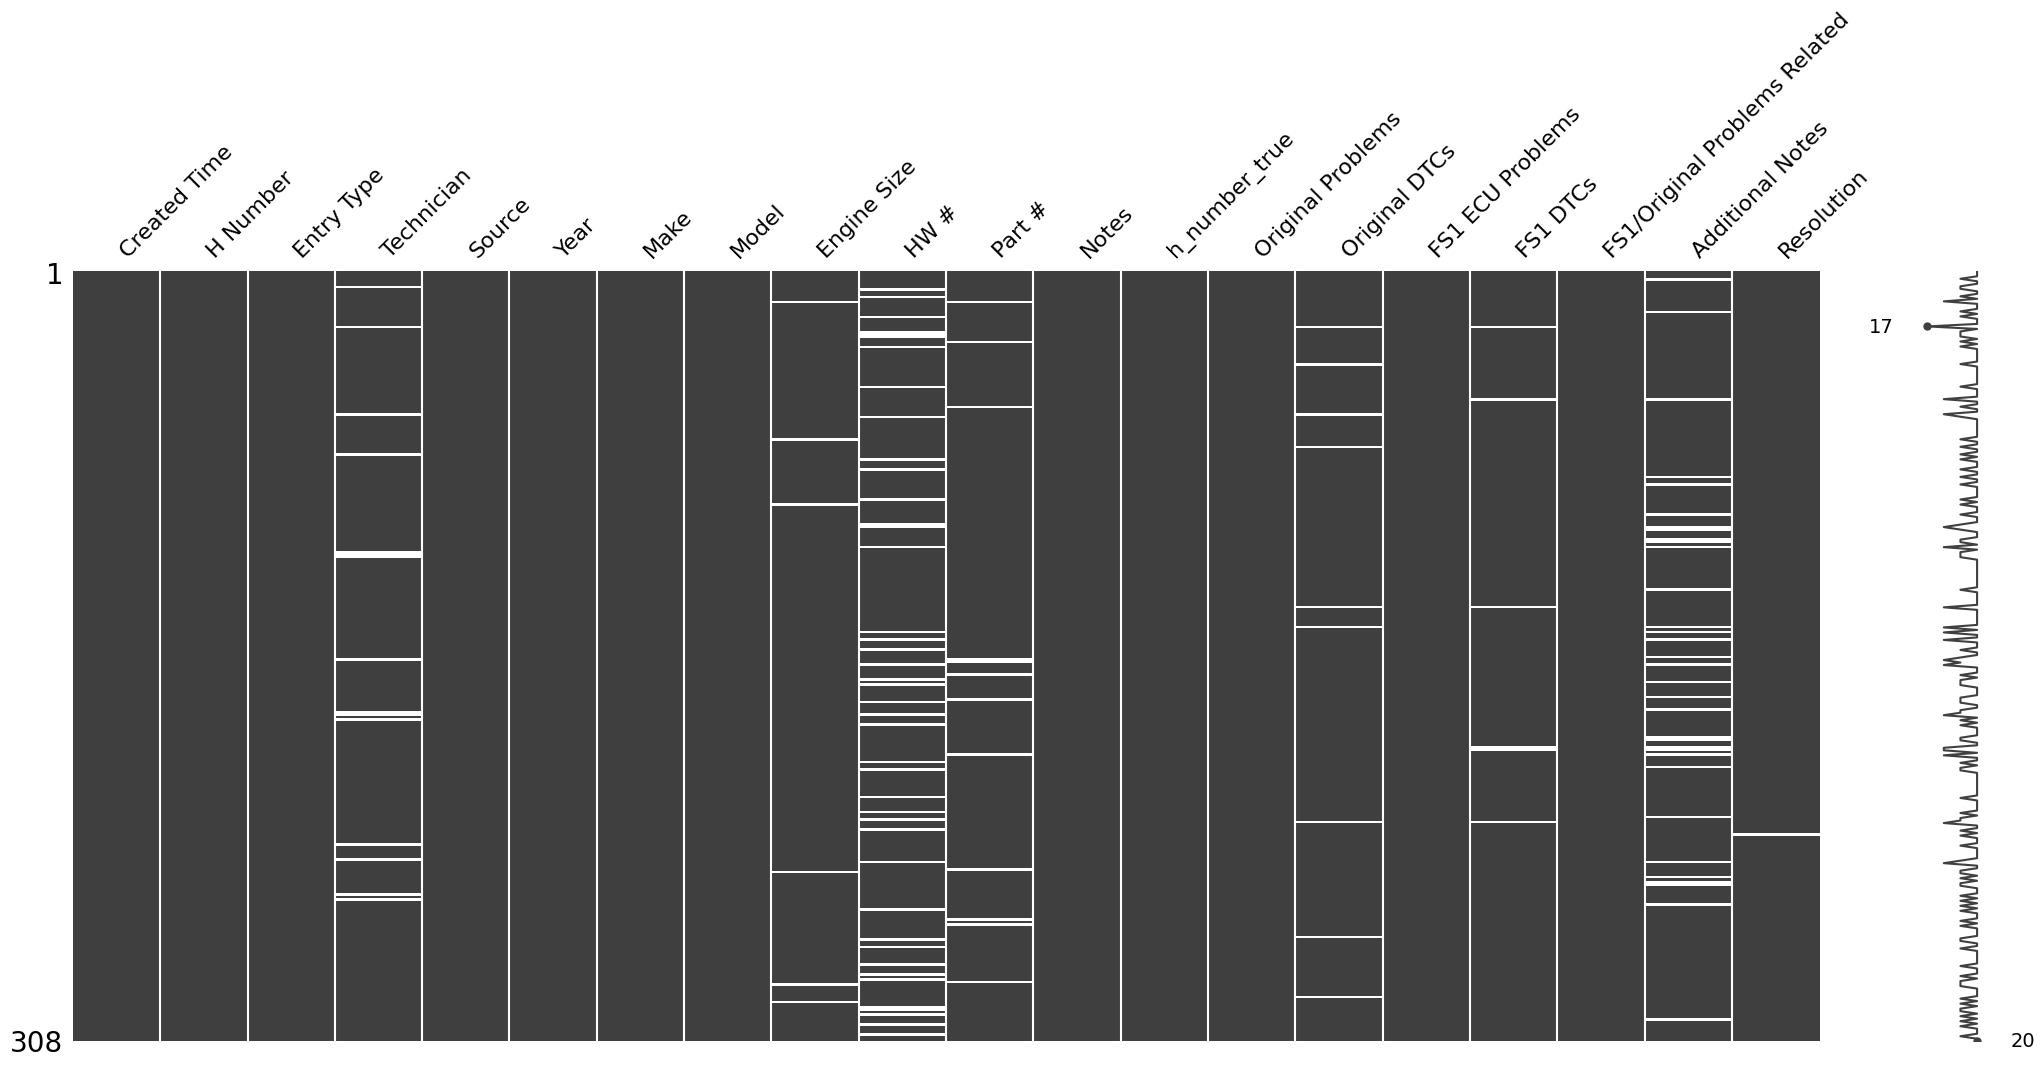

In [101]:
# Chart to see possible empty rows
msno.matrix(df_google_form_filtered_true)

The columns with the original problems and with the fs1 ECM problems has no null values, which is correct. However, the chart shows one of the raws are empty, but should not because this field is mandatory with the conclusion of the diagnostic.
The next lines of codes are used to see why the technician left the resolution field empty.

In [102]:
# Create a series with the rows without values
df_google_form_filtered_true_reso_na = df_google_form_filtered_true['Resolution'].isna()

In [103]:
# Filter only the true values
df_google_form_filtered_true_reso_na[df_google_form_filtered_true_reso_na == True]

6158    True
Name: Resolution, dtype: bool

In [104]:
# Print the diagnostic notes using the filtered index and show why the resolution field is empty
print(df_google_form_filtered_true['Notes'][6158])

Account #: H1637433
Problem(s) experienced with the original unit: Evaporative Emissions
System, Ignition Coils, Unsure, either the same no start issue or
power steering
DTCs present with original unit:
P0352 Ignition Coil B Primary/Secondary Circuit Malfunction
P0441 Evaporative Emission Control System Incorrect Purge Flow
Problem(s) experienced with the unit we've provided: Immobilizer/Security
DTCs present with unit we've provided:
b2799
Are the original and current problems related? Uncertain
Were the appropriate diagnostic steps followed? No
Additional Notes: Last two accounts that this was used for were also unable to relearn the obd tool/immo H1492834 H1603485 

Customer requires replacement and this module should be cored for parts only


The resolution field does not exist therefore, the additional notes field was used to provide the diagnostic resolution. In this case, the string 'Customer requires replacement and this module should be cored for parts only' will be placed under the resolution field.

In [105]:
# Realocate the resolution to the resolution field
df_google_form_filtered_true.loc[6158, 'Resolution'] = 'Customer requires replacement and this module should be cored for parts only'

In [106]:
# Print the line with the corrected data
df_google_form_filtered_true['Resolution'][6158]

'Customer requires replacement and this module should be cored for parts only'

<Axes: >

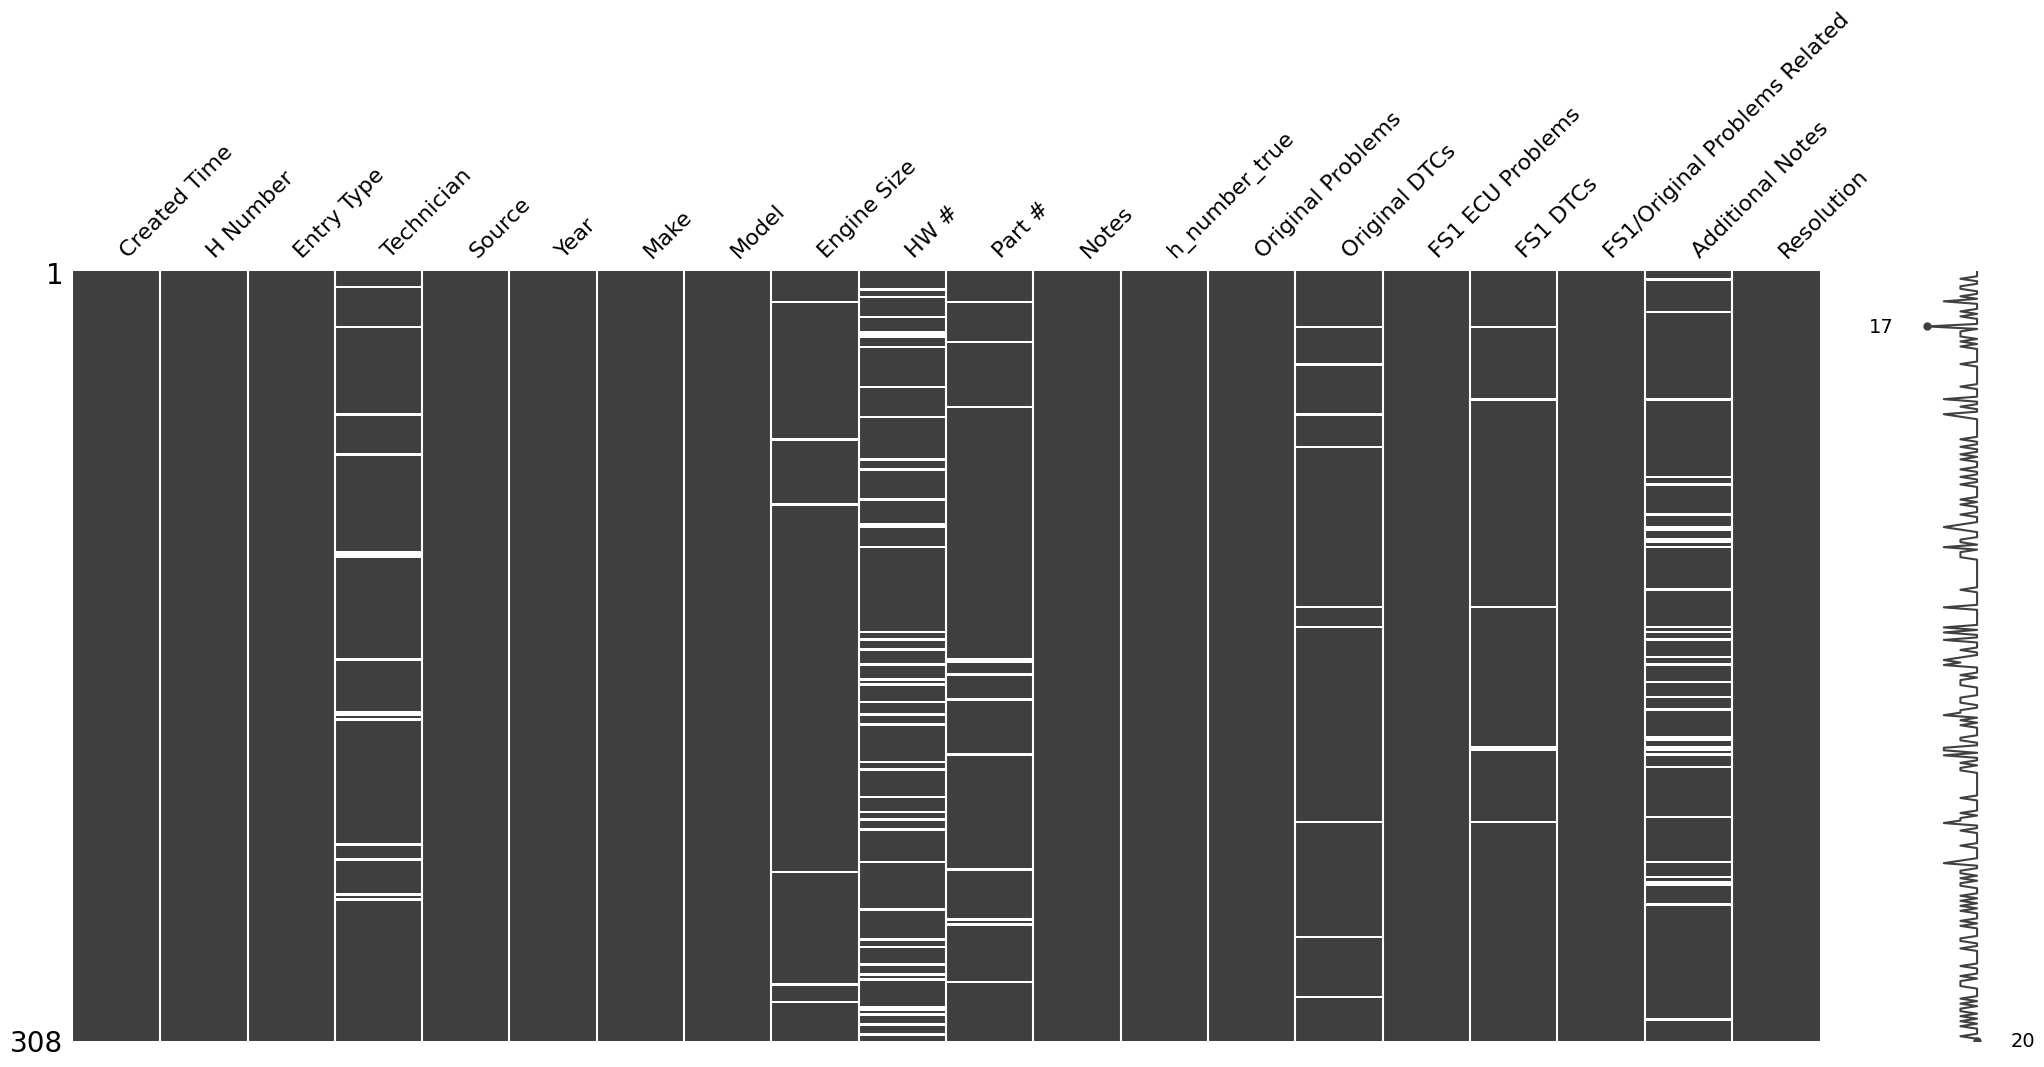

In [107]:
# Print the chart again to confirm the correction
msno.matrix(df_google_form_filtered_true)

In [109]:
# Function to remove all the characteres from the created columns
def remove_chars(df):
    # Create a copy from input df
    df_cleaned = df.copy()

    # Create a list with the column names the function will be used for
    columns_to_clear = ['Original Problems', 'Original DTCs',
                        'FS1 ECU Problems', 'FS1 DTCs', 'FS1/Original Problems Related',
                        'Additional Notes', 'Resolution']
    
    # Loop to iterate over the list of column names
    for column in columns_to_clear:
        # Condition to match the columns in the main df
        if column in df_cleaned.columns:
            # Use the method 'replace' to remove the chars
            df_cleaned[column] = (df_cleaned[column].replace(r'<[^>]*>|</[^>]*>|\n|:|=|\?|\\|\/|\r|\t', '', regex=True).str.strip())
    
    # Return a copy of the df cleaned 
    return df_cleaned

In [ ]:
# Call the function to remove the chars
df_google_form_filtered_true_nochars = remove_chars(df_google_form_filtered_true)

In [116]:
# Show the df info 
df_google_form_filtered_true_nochars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 1 to 8377
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Created Time                   308 non-null    object 
 1   H Number                       308 non-null    object 
 2   Entry Type                     308 non-null    object 
 3   Technician                     293 non-null    object 
 4   Source                         308 non-null    object 
 5   Year                           308 non-null    float64
 6   Make                           308 non-null    object 
 7   Model                          308 non-null    object 
 8   Engine Size                    302 non-null    object 
 9   HW #                           266 non-null    object 
 10  Part #                         296 non-null    object 
 11  Notes                          308 non-null    object 
 12  h_number_true                  308 non-null    bool   

In [149]:
# Drop the column 'h_number_true' as it is no longer needed
df_google_form_last_version = df_google_form_filtered_true_nochars.drop(columns=['h_number_true'])

In [150]:
# Concatenate the cleaned dataframes prescreened with the CRM form (df_zoho_form_last_update) and and prescreened with the google form (df_google_form_filtered_true)  
df_zoho_google_cleaned_concatenated = pd.concat([df_zoho_form_last_update, df_google_form_last_version], axis=0) 

In [156]:
# Reset the index
df_zoho_google_cleaned_reset_index = df_zoho_google_cleaned_concatenated.reset_index(drop=True)

In [157]:
# Mapping the column names to rename the columns of the main df to import it to the database
column_mapping = {
    0: 'index',
    'Created Time': 'created_time',
    'H Number': 'h_number',
    'Entry Type': 'entry_type',
    'Technician': 'technician',
    'Source': 'source',
    'Year': 'year',
    'Make': 'make',
    'Model': 'model',
    'Engine Size': 'engine_size',
    'HW #': 'hdw_number',
    'Part #': 'part_number',
    'Notes': 'notes',
    'Original Problems': 'original_problems',
    'Original DTCs': 'original_dtcs',
    'FS1 ECU Problems': 'fs1_ecu_problems',
    'FS1 DTCs': 'fs1_dtcs',
    'FS1/Original Problems Related': 'fs1_original_problems_related',
    'Additional Notes': 'additional_notes',
    'Resolution': 'resolution'
}

In [158]:
# Rename the columns using the column map dict
df_zoho_form_cleaned_renamed_columns = df_zoho_google_cleaned_concatenated.rename(columns=column_mapping)

In [159]:
# Check the info
df_zoho_form_cleaned_renamed_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5352 entries, 13 to 8377
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_time                   5352 non-null   object 
 1   h_number                       5352 non-null   object 
 2   entry_type                     5352 non-null   object 
 3   technician                     5337 non-null   object 
 4   source                         5352 non-null   object 
 5   year                           5352 non-null   float64
 6   make                           5352 non-null   object 
 7   model                          5351 non-null   object 
 8   engine_size                    5204 non-null   object 
 9   hdw_number                     4738 non-null   object 
 10  part_number                    5085 non-null   object 
 11  notes                          5352 non-null   object 
 12  original_problems              5352 non-null   objec

In [161]:
# Save the cleaned dataframe to a .csv file
df_zoho_form_cleaned_renamed_columns.to_csv('df_zoho_google_cleaned.csv', index=False)

In [162]:
df_zoho_form_cleaned_renamed_columns.head(2)

,created_time,h_number,entry_type,technician,source,year,make,model,engine_size,hdw_number,part_number,notes,original_problems,original_dtcs,fs1_ecu_problems,fs1_dtcs,fs1_original_problems_related,additional_notes,resolution
13,"Jul 03, 2024 12:34 PM",H1483335,Pre-Screen Form Completed,Adeosun,S280762,2006.0,Saturn,ION,2.2L,E16A-26S,12605786,Extended Note:\n<hr><b>Task Owner:</b> Adeosun...,No power when accelerating,NO ERROR CODES,MODULE WOULD NOT START THE CAR PASSKEY II Pro...,None,No,I recommend we have the customer verify that t...,Customer must perform additional diagnosticsec...
14,"Jul 05, 2024 12:44 PM",H1480306,Pre-Screen Form Completed,Adeosun,S280194,2009.0,Ford,F-Series Truck,5.4L,9C2A-12B684-AC,9L3A-12A650-BXD,Extended Note:\n<hr><b>Task Owner:</b> Adeosun...,It starts but no ground for bank 2 sensor 1 o2...,P0050,It start but had code code p1639 vid programmi...,P1639,No,"Return both the original unit and our unit, so...","Return both the original unit and our unit, so..."
